<a href="https://colab.research.google.com/github/afham123/Deep-Learning-Project/blob/main/CNN%20Model(Mnist_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.datasets import mnist
%matplotlib inline

In [51]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
print(X_test.shape)
print(y_train.shape)

(10000, 28, 28)
(60000,)


In [ ]:
single_img=X_train[0]

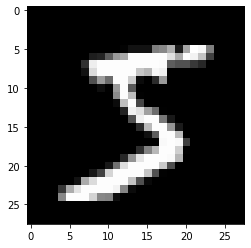

In [ ]:
plt.imshow(single_img,cmap='gray')

In [ ]:
y_train[0]

5

In [52]:
X_train=X_train/255
X_test=X_test/255

In [53]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [54]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000 , 28, 28, 1)

In [55]:
from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [56]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [58]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1),activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [61]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2687 - accuracy: 0.9164 - val_loss: 0.0520 - val_accuracy: 0.9833
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0500 - accuracy: 0.9852 - val_loss: 0.0456 - val_accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0343 - accuracy: 0.9900 - val_loss: 0.0421 - val_accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0249 - accuracy: 0.9930 - val_loss: 0.0348 - val_accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0210 - accuracy: 0.9939 - val_loss: 0.0445 - val_accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0164 - accuracy: 0.9954 - val_loss: 0.0468 - val_accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0140 - accuracy: 0.9965 - val_loss: 0.0590 -

In [ ]:
loss_df=pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.040535,0.988250,0.044611,0.9869
1,0.031058,0.990933,0.053878,0.9839
2,0.023350,0.993417,0.044469,0.9869
3,0.019885,0.994200,0.047323,0.9870
4,0.015978,0.995583,0.044690,0.9884


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
predictions=model.predict_classes(X_test)
predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
predictions[0]

7

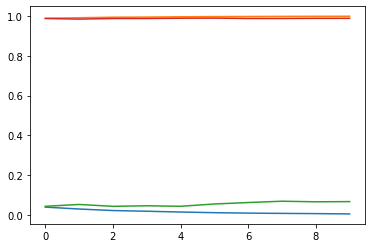

In [ ]:
plt.plot(loss_df)
plt.show()

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
print(accuracy_score(y_test,predictions))

0.9879


In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 970    0    2    2    0    1    3    0    2    0]
 [   0 1126    1    4    0    1    2    1    0    0]
 [   0    0 1020    1    0    0    1    8    2    0]
 [   0    0    0 1003    0    4    0    1    2    0]
 [   1    0    0    0  967    0    4    0    2    8]
 [   1    0    1    8    0  880    2    0    0    0]
 [   4    1    0    2    1    3  946    0    1    0]
 [   0    1    4    1    0    0    0 1015    1    6]
 [   1    0    2    3    0    1    1    2  963    1]
 [   0    1    0    4    6    3    0    1    5  989]]


In [46]:
lst1=[]
lst2=[]

for i in range(10):
  lst1.append('Predictes_'+str(i))
  lst2.append('Actually_'+str(i))
lst1

['Predictes_0',
 'Predictes_1',
 'Predictes_2',
 'Predictes_3',
 'Predictes_4',
 'Predictes_5',
 'Predictes_6',
 'Predictes_7',
 'Predictes_8',
 'Predictes_9']

In [47]:
confusion_matrix_df=pd.DataFrame(index=lst2,columns=lst1,data=confusion_matrix(y_test,predictions))
confusion_matrix_df

,Predictes_0,Predictes_1,Predictes_2,Predictes_3,Predictes_4,Predictes_5,Predictes_6,Predictes_7,Predictes_8,Predictes_9
Actually_0,970,0,2,2,0,1,3,0,2,0
Actually_1,0,1126,1,4,0,1,2,1,0,0
Actually_2,0,0,1020,1,0,0,1,8,2,0
Actually_3,0,0,0,1003,0,4,0,1,2,0
Actually_4,1,0,0,0,967,0,4,0,2,8
Actually_5,1,0,1,8,0,880,2,0,0,0
Actually_6,4,1,0,2,1,3,946,0,1,0
Actually_7,0,1,4,1,0,0,0,1015,1,6
Actually_8,1,0,2,3,0,1,1,2,963,1
Actually_9,0,1,0,4,6,3,0,1,5,989


In [62]:
model.save('My_model.h5')